<a href="https://colab.research.google.com/github/shawn-kg/DataMining/blob/main/assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Non-Linear Dimensionality Reduction: Kernel PCA

## Linear Kernel PCA

Variances
[-1.70623132e-10 -1.03603174e-10 -4.94937169e-11 ...  3.93806145e+01
  8.10578793e+01  1.56219562e+05]
Reduced to dimension: 
1


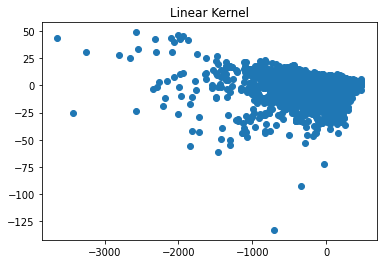

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv('./OnlineNewsPopularity.csv')
data = data.drop(data.columns[[0,1,4,5,6,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,60]], axis=1)
data = data.iloc[:5000]
data = data.to_numpy()
# print(data)


K = np.dot(data,data.transpose())
    
# print(K)

id = np.identity(5000)
ones = np.ones((5000,5000))
ones = ones/5000
center_helper = id - ones
# print(center_helper)
center_helper2 = np.dot(center_helper,K)
K_hat = np.dot(center_helper2,center_helper)
# print(K_hat)
E, C = np.linalg.eigh(K_hat)

# print("Eigenvalues")
# print(E)
# print(C)

variances = E / 5000
n = np.sum(variances)
# print(n)
C_unit = np.zeros((5000,5000))
# print("Eigenvalues divided by 5000")
print("Variances")
print(variances)

for i in reversed(range(5000)):
  C_unit[:,i] = math.sqrt(1/abs(E[i]))*C[:,i]

count = 0
var = 0
for i in reversed(range(5000)):
  if count == 29:
    break
  var+=variances[i]
  if var/n >= .95:
    count+=1
    break
  count+=1
print("Reduced to dimension: ")
print(count)

new_basis = np.zeros((5000,2))
new_basis[:,0] = C_unit[:,4999]
new_basis[:,1] = C_unit[:,4998]
# print(new_basis)



a = np.dot(K_hat,new_basis)

plt.scatter(a[:,0],a[:,1])
plt.title("Linear Kernel")
plt.show()
 

## Covariance Projection

Eigenvalues
[4.15096697e-17 1.85030656e-05 1.67995172e-04 8.14527062e-04
 1.07696112e-03 1.42294495e-03 2.47939602e-03 4.93692327e-03
 8.07120488e-03 1.13326699e-02 1.54721430e-02 2.39268281e-02
 2.69760865e-02 4.30234672e-02 5.44823138e-02 6.11495109e-02
 7.47460403e-02 7.61925997e-02 9.95463990e-02 1.16400053e-01
 1.68634693e-01 2.55295982e-01 3.48504067e+00 3.80350554e+00
 1.57176844e+01 2.36601568e+01 3.93806145e+01 8.10578793e+01
 1.56219562e+05]


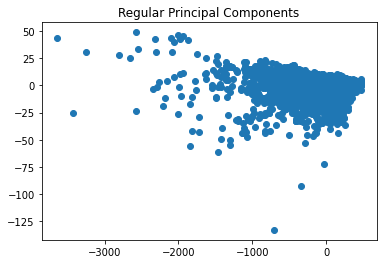

In [6]:
means = np.mean(data, axis=0);
dHat = data - means
cov = np.dot(np.transpose(dHat),dHat)/data.shape[0]

eigval, eigvec = np.linalg.eigh(cov)
print("Eigenvalues")
print(eigval)
cov_basis = np.zeros((29,2))
cov_basis[:,0] = eigvec[:,28]
cov_basis[:,1] = eigvec[:,27]
proj = np.dot(dHat,cov_basis)

plt.scatter(proj[:,0],proj[:,1])
plt.title("Regular Principal Components")
plt.show()

The eigenvalues for the covariance matrix and the linear kernel PCA (when divided by the n=5000) are the same while the projections are the same.

## Gaussian Kernel PCA

Reduced to dimension: 
5


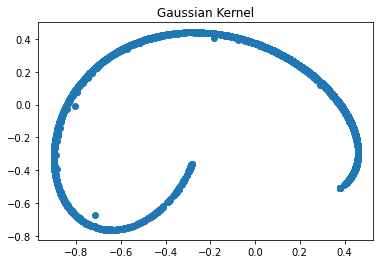

In [7]:


S = np.zeros((5000,1))
for i in range(5000):
  S[i] = np.dot(data[i],data[i])
spread = 2*100000
K2 = np.exp((2 * np.dot(data,np.transpose(data)) - S - np.transpose(S))/spread)
# print(K2)



id = np.identity(5000)
ones = np.ones((5000,5000))
ones = ones/5000
center_helper = id - ones
center_helper2 = np.dot(center_helper,K2)
K_hat2 = np.dot(center_helper2,center_helper)
E2, C2 = np.linalg.eigh(K_hat2)
# print(K_hat2)


variances2 = E2 / 5000
n = np.sum(variances2)
C_unit2 = np.zeros((5000,5000))


for i in reversed(range(5000)):
  C_unit2[:,i] = (1/math.sqrt(abs(E2[i])))*C2[:,i]
count = 0
var = 0
for i in reversed(range(5000)):
  var+=variances2[i]
  if var/n >= .95:
    count+=1
    break
  count+=1
print("Reduced to dimension: ")
print(count)

new_basis2 = np.zeros((5000,2))
new_basis2[:,0] = C_unit2[:,4999]
new_basis2[:,1] = C_unit2[:,4998]

# print(new_basis2)



a2 = np.dot(K_hat2,new_basis2)

plt.scatter(a2[:,0],a2[:,1])
plt.title("Gaussian Kernel")
plt.show()

## Inhomogeneous Kernel PCA

Reduced to dimension: 
1


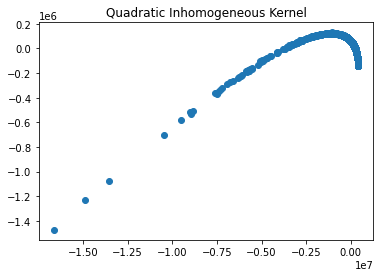

In [8]:
q = 2
c = 100000
K3_first = np.dot(data,data.transpose()) + c
K3 = np.power(K3_first, q)
# print(K3)

id = np.identity(5000)
ones = np.ones((5000,5000))
ones = ones/5000
center_helper = id - ones
center_helper3 = np.dot(center_helper,K3)
K_hat3 = np.dot(center_helper3,center_helper)
E3, C3 = np.linalg.eigh(K_hat3)
# print(K_hat3)


variances3 = E3 / 5000
n = np.sum(variances3)
C_unit3 = np.zeros((5000,5000))


for i in reversed(range(5000)):
  C_unit3[:,i] = (1/math.sqrt(abs(E3[i])))*C3[:,i]
count = 0
var = 0
for i in reversed(range(5000)):
  var+=variances3[i]
  if var/n >= .95:
    count+=1
    break
  count+=1
print("Reduced to dimension: ")
print(count)

new_basis3 = np.zeros((5000,2))
new_basis3[:,0] = C_unit3[:,4999]
new_basis3[:,1] = C_unit3[:,4998]

# print(new_basis3)



a3 = np.dot(K_hat3,new_basis3)

plt.scatter(a3[:,0],a3[:,1])
plt.title("Quadratic Inhomogeneous Kernel")
plt.show()

The best 2D approximation would be the quadratic inhomogeneous kernel since the data is the most spread out in their specific direction using this kernel PCA. This means that we have maximized the variance the  most using this model.